<font color=orange>**Python Hackathon December 2023**</center></font>

<div class="alert alert-block alert-success">
<b><p><h1><center>Team 8 : Python Pioneers </center></h1> </p></b> 
</div>

<div class="alert alert-block alert-info">
<b><h3><center>Exam Stress Analysis</center></h3></b> 
</div>

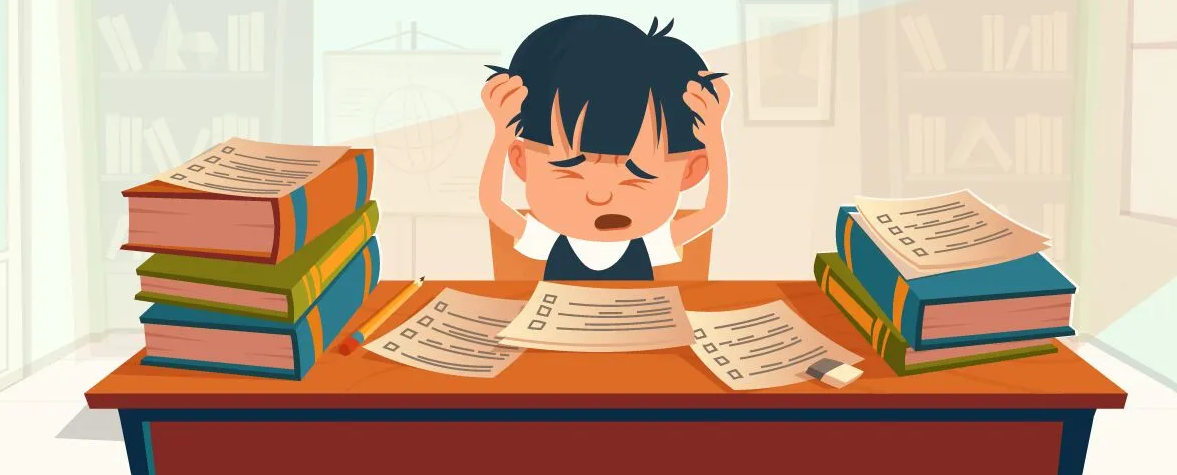

**<h3>Table of Content</h3>**
- [x] Introduction Exam Stress Analysis Dataset
- [x] Importing Data and Libraries
- [x] Hackathon Problem Statements (1-80)
- [x] Reference

# Introduction Exam Stress Analysis Dataset

The data contains electrodermal activity, heart rate, blood volume pulse, skin surface temperature, inter beat interval and accelerometer data recorded during three exam sessions (midterm 1, midterm 2 and final) as well as their corresponding grades. 

- <h3><p>Data Description</h3></P>

     *  Demographics  : Includes all patient details, masked for privacy
     *  IBI(Inter Beat Interval)  : Records the number of milliseconds that have passed between one heart beat and the next. The device records at 10 millisecond intervals sampled at the rate of 4 per minute.This dataset has been aggregated to 1 minute each.
     *  RMSSD  : Root mean square of Successive Standard Deviations from mean IBI.Must be calculated as 30 successive minutes of IBI averaged by student per exam
     *  HRV(Heart rate variability)  :Not the same as variation around a mean. HRV is the abiilty of the heart to respond to changes in blood flow demands within one beat. Since RMSSD is calculated for 30 minutes, Final Exams are 3 hours and Mid-terms are 1.5 hours. 600ms * RMSSD must be adjusted for this difference. 
     *  Time In Minutes  : Time elapsed from the start of the exam.The original unix timestamp has been converted to a simple minute ID to help you see how many minutes have elapsed from the start of each exam
     *  EDA(Electro Dermal activity)  : Electric signals that show nervous system activity. For the purpose of this hackathon, you can assume that higher actiivity indicates higher levels of stress
     *  HR(Heart rate)  : Averaged to number of beats for the corresponding minute
     *  Temp  : Basal Body temperature.Averaged to body temp for the corresponding minute


# Importing Data and Libraries

<h4>Python Libraries used for our Anlayis</h4>

In [13]:
# pip install panda
# pip install matplotlib
# pip install numpy
# pip install seaborn
# pip install colorama
# pip install wordcloud
# pip install plotly

In [14]:
import pandas as pd
import numpy as np
import random
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

<h4>Importing Exam Stress Dataset</h4>

In [15]:
df_Grades = pd.read_excel("Exam Stress Final.xlsx")
df_Demography =pd.read_excel("Exam Stress Final.xlsx",sheet_name="Demography")
df_EDA =pd.read_excel("Exam Stress Final.xlsx",sheet_name="EDA")
df_HR =pd.read_excel("Exam Stress Final.xlsx",sheet_name="HR")
df_Temp =pd.read_excel("Exam Stress Final.xlsx",sheet_name="Temp")
df_IBI=pd.read_excel("Exam Stress Final.xlsx",sheet_name="IBI")

# Hackathon Problem Statements (1-80)

<div class="alert alert-block alert-warning">
<b>Q1 :</b>Using the mean interbeat interval per minute, calculate the Root Mean Square of successive differences for any 30 minute interval and add this to IBI
</div>

<div class="alert alert-block alert-warning">
<b>Q2 :</b>Group the rows in the file EDA into 3 parts based on time: First, Second, Third part of each exam
</div>

<div class="alert alert-block alert-warning">
<b>Q3 :</b>Based on the calculation in question 2, which part of the exam did students suffer maximum stress? You may assume that higher recorded skin conductance co-incides with high levels of stress
</div>

<div class="alert alert-block alert-warning">
<b>Q4 :</b>Using Root Mean Square of Successive differences calculated in Q1, calculate and store HRV per exam for every student. 
</div>

<div class="alert alert-block alert-warning">
<b>Q5 :</b>Join alla tables to produce one file that contains all student 1's readings for IBI, EDA , HR and temp
</div>

<div class="alert alert-block alert-warning">
<b>Q6 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q7 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q8 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q9 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q10 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q11 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q12:</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q13 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q14 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q15 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q16 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q17 :</b>What % of all students are Asian?
</div>

In [132]:
#Defined a function to calculate the percentage
def asian_percentage(students):
    total_students = len(students)
    
    # Count the number of Asian students
    asian_students = students[students['Race'] == 'Asian'].shape[0]
    
    # Calculate the percentage
    asian_percentage = (asian_students / total_students) * 100
    
    return asian_percentage

percentage = asian_percentage(df_Demography)
print(f'The percentage of Asian students is: {percentage:.1f}%')


The percentage of Asian students is: 20.0%


<div class="alert alert-block alert-warning">
<b>Q18 :</b>Display the full name of all students born in 2010
</div>

In [133]:
# Filter and display full names of students born in 2010
born_2010 = df_Demography[df_Demography['DOB'].dt.year == 2010]
full_names = born_2010[['Student_id','First Name','Last Name']]

# Set a custom index
full_names.set_index('Student_id', inplace=True)

# Display the result
print("Full name(s) of students born in 2010:")
print(full_names)


Full name(s) of students born in 2010:
           First Name  Last Name
Student_id                      
S07             Roger  Frederick


<div class="alert alert-block alert-warning">
<b>Q19 :</b>What was the average HR of the students who achieved the top 3 grades in mid-term 2
</div>

In [134]:
mid_term2_grades = df_Grades[['Student_id','Midterm 2']]
heart_rate = df_HR[['Student_id','HR']]

# Group by 'StudentID' and calculate the average 'HR' for each student
average_hr_per_student = heart_rate.groupby('Student_id')['HR'].mean().reset_index()

# Merge the two DataFrames on 'StudentID'
merge_hr_grades = pd.merge(mid_term2_grades, average_hr_per_student, on='Student_id')


# Sort the DataFrame by Midterm2_Grade in descending order
sorted_grades_top3 = merge_hr_grades.sort_values(by='Midterm 2', ascending=False).head(3)

# Set a custom index
sorted_grades_top3.set_index('Student_id', inplace=True)

print("The average HR of the students who achieved the top 3 grades in mid-term 2 :")
print(sorted_grades_top3)

The average HR of the students who achieved the top 3 grades in mid-term 2 :
            Midterm 2          HR
Student_id                       
S03                90  103.283502
S08                88  105.475896
S02                85  114.313813


<div class="alert alert-block alert-warning">
<b>Q20 :</b>Use a bar chart to display the grades of every student in mid term 1
</div>

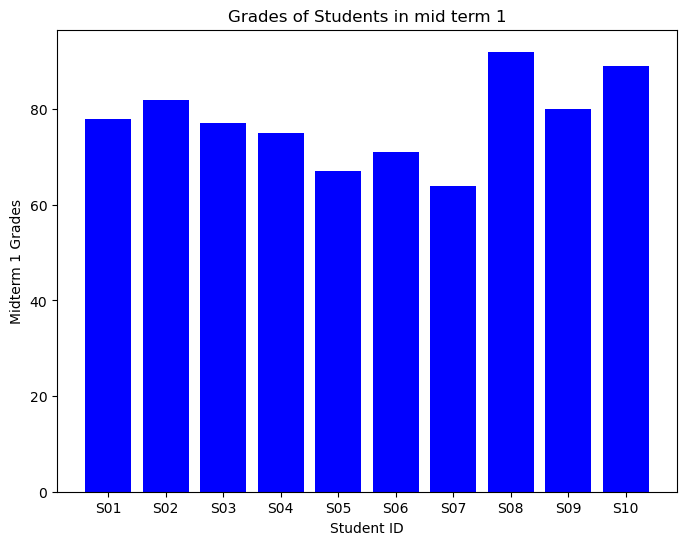

In [135]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_Grades['Student_id'], df_Grades['Midterm 1'], color='blue')
plt.xlabel('Student ID')
plt.ylabel('Midterm 1 Grades')
plt.title('Grades of Students in mid term 1')
plt.show()

<div class="alert alert-block alert-warning">
<b>Q21 :</b>What % of all students are female?
</div>

In [136]:
#Defined a function to calculate the percentage of female students

def female_percentage(students):
    total_students = len(students)
    
    # Count the number of Asian students
    female_students = students[students['Gender'] == 'F'].shape[0]
    
    # Calculate the percentage
    female_percentage = (female_students / total_students) * 100
    
    return female_percentage

percentage = female_percentage(df_Demography)
print(f'The percentage of Female students is: {percentage:.1f}%')

The percentage of Female students is: 50.0%


<div class="alert alert-block alert-warning">
<b>Q22 :</b>Show the students for whom temperature fell below basal body temp of 36 degrees
</div>

In [137]:
student_temp = df_Temp[['Student_id','TEMP']]

# Group by 'StudentID' and calculate the average Temperature for each student
average_temp_per_student = student_temp.groupby('Student_id')['TEMP'].mean().reset_index()

# Set a custom index
average_temp_per_student.set_index('Student_id', inplace=True)

student_below_36 = average_temp_per_student[average_temp_per_student['TEMP']<36]

print("Students for whom temperature fell below basal body temp of 36 degrees:")
print(student_below_36)

Students for whom temperature fell below basal body temp of 36 degrees:
                 TEMP
Student_id           
S01         26.475624
S010        26.187834
S02         28.224066
S03         26.899314
S04         26.826271
S05         28.553185
S06         27.228459
S07         25.569712
S08         28.464253
S09         28.453486


<div class="alert alert-block alert-warning">
<b>Q23 :</b>Connect to sql and query the data in temp into a table of the same name
</div>

<div class="alert alert-block alert-warning">
<b>Q24 :</b>Display a sunburst chart of count of students by Age, Gender and Race
</div>

In [170]:
import pandas as pd
import plotly.express as px

from datetime import datetime
Demographics = df_Demography

# Convert 'DOB' column to datetime
Demographics['DOB'] = pd.to_datetime(Demographics['DOB'])

# Calculate the age and add it as a new column
current_date = datetime.now()
Demographics['Age'] = (current_date - Demographics['DOB']).astype('<m8[Y]')

# Create a sunburst chart
fig = px.sunburst(Demographics, path=['Age', 'Gender', 'Race'], title='Count of Students by Age, Gender, and Race')

# Show the chart
fig.show()

<div class="alert alert-block alert-warning">
<b>Q25 :</b>Create a visualization on the count of Students with an HRV 10 or more points lower than ideal HRV.
</div>

<div class="alert alert-block alert-warning">
<b>Q26 :</b>Plot a graph to show the distribution of score in the final exam by gender
</div>

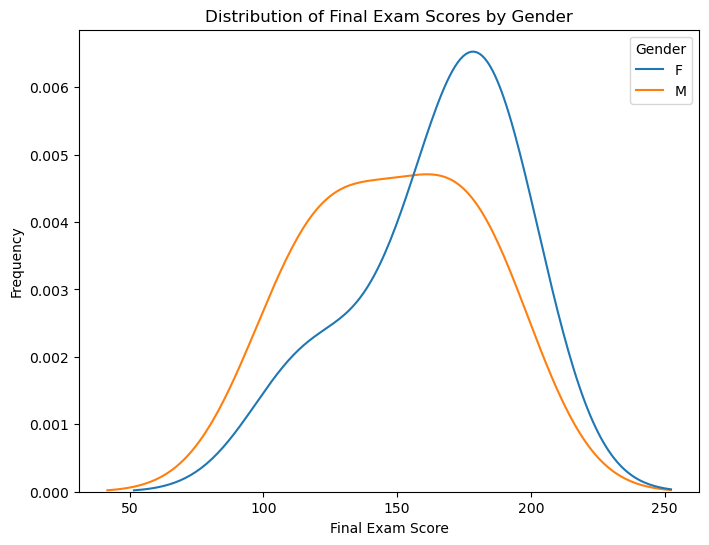

In [140]:
# Merge the two DataFrames on 'StudentID'
merge_demo_grades = pd.merge(df_Grades, df_Demography, on='Student_id')
final_exam_gender =merge_demo_grades[['Student_id','Gender','final']]
# Plot the distribution of scores in the final exam by gender
plt.figure(figsize=(8, 6))
sns.kdeplot(data=final_exam_gender, x="final", hue="Gender")
plt.title('Distribution of Final Exam Scores by Gender')
plt.xlabel('Final Exam Score')
plt.ylabel('Frequency')
plt.show()


<div class="alert alert-block alert-warning">
<b>Q27 :</b>Which demographic has the lowest average of scores in all 3 exams
</div>

In [141]:
# Merge demographics with scores
demo_grade_merge = pd.merge(df_Demography, df_Grades, on='Student_id')
# Calculate average scores for each demographic group
df_averages = demo_grade_merge.groupby(['Gender', 'Race'])['Midterm 1','Midterm 2','final'].mean()

# Find the demographic with the lowest average
lowest_average_demographic = df_averages.mean(axis=1).idxmin()
df_averages['Average Score'] = round(df_averages.mean(axis=1),2)
print("Demographics based analysis on grades:\n")
print(df_averages)

print("\nDemographic with the lowest average scores:\n")
print(lowest_average_demographic)


Demographics based analysis on grades:

                Midterm 1  Midterm 2  final  Average Score
Gender Race                                               
F      African       67.0       77.0  157.0         100.33
       Asian         77.0       90.0  188.0         118.33
       Spanish       89.0       64.0  116.0          89.67
       White         80.0       83.5  181.0         114.83
M      African       67.5       48.5  142.5          86.17
       Asian         75.0       77.0  149.0         100.33
       White         86.0       63.5  155.0         101.50

Demographic with the lowest average scores:

('M', 'African')


<div class="alert alert-block alert-warning">
<b>Q28 :</b>Delete the column age from question 12, using an iterative loop
</div>

<div class="alert alert-block alert-warning">
<b>Q29 :</b>Create a heat map of HRV, temp and scores. To show the correlation beween these variables
</div>

<div class="alert alert-block alert-warning">
<b>Q30 :</b>Use the dataset given and Enumerate in Python with any example.
</div>

In [183]:
# displaying Demographics of eevery female student using enumerate
import pandas as pd

# Enumerate through all rows in the Demographics dataframe
for index, row in df_Demography[df_Demography['Gender'] == 'F'].iterrows():
    #print(f"Index: {index}")
    print("Demographics of Female Students:\n")
    print(row)
    print("_________________________________")

Demographics of Female Students:

Student_id                    S01
DOB           2009-01-01 00:00:00
First Name                Barbara
Last Name                 Walters
Gender                          F
Race                        White
Age                          14.0
Name: 0, dtype: object
_________________________________
Demographics of Female Students:

Student_id                    S02
DOB           2009-02-02 00:00:00
First Name                   Nora
Last Name                   Jones
Gender                          F
Race                        White
Age                          14.0
Name: 1, dtype: object
_________________________________
Demographics of Female Students:

Student_id                    S03
DOB           2009-07-12 00:00:00
First Name                Gabriel
Last Name                 Willows
Gender                          F
Race                        Asian
Age                          14.0
Name: 2, dtype: object
_________________________________
Demographics 

<div class="alert alert-block alert-warning">
<b>Q31 :</b>Create a jointplot on EDA & Grades.
</div>

<Figure size 800x600 with 0 Axes>

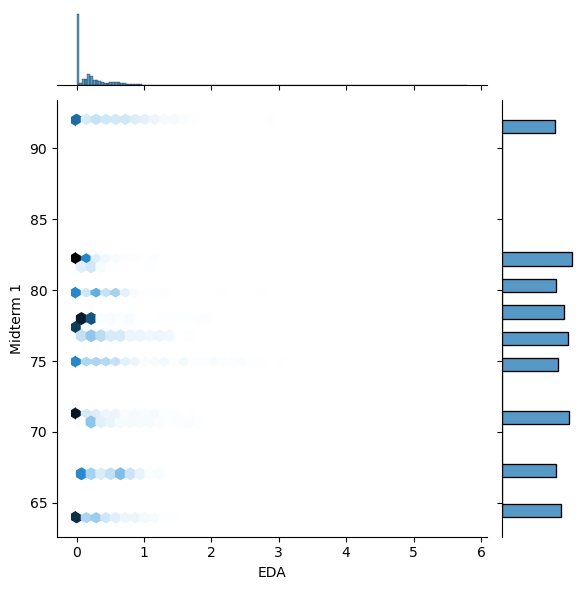

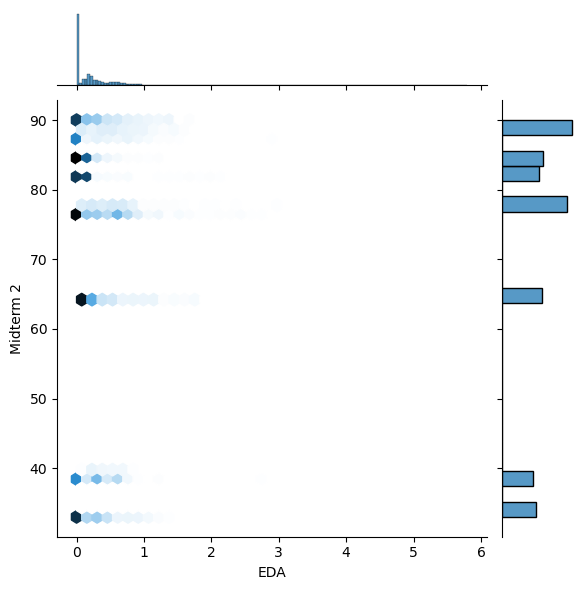

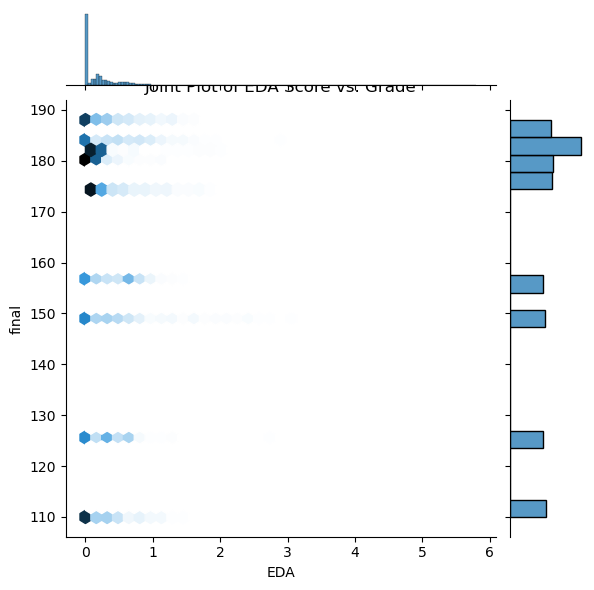

In [143]:

# Merge DataFrames on 'Name'
merged_eda_grades = pd.merge(df_EDA, df_Grades, on='Student_id')
#print(merged_eda_grades)

# Group by 'StudentID' and calculate the average 'HR' for each student
#average_EDA_student = merged_eda_grades.groupby('Student_id')['EDA'].mean().reset_index()
#print(average_EDA_student)

# Create a joint plot
plt.figure(figsize=(8, 6))
sns.jointplot(data=merged_eda_grades, x='EDA', y='Midterm 1', kind='hex')
sns.jointplot(data=merged_eda_grades, x='EDA', y='Midterm 2', kind='hex')
sns.jointplot(data=merged_eda_grades, x='EDA', y='final', kind='hex')
plt.title('Joint Plot of EDA Score vs. Grade')
plt.show()


<div class="alert alert-block alert-warning">
<b>Q32 :</b>Use indexing , loc to retrieve the row with maximum HR
</div>

In [144]:

# Find the index with the maximum value in 'HR' column
max_hr_index = df_HR['HR'].idxmax()

# Use loc to retrieve the row with the maximum HR
row_with_max_hr = df_HR.loc[max_hr_index]

# Display the result
print("Row with maximum HR:")
print(row_with_max_hr)

Row with maximum HR:
HR                199.278
Time in mins         41.0
Student_id            S04
Exam            Midterm 1
Name: 2720, dtype: object


<div class="alert alert-block alert-warning">
<b>Q33 :</b>Make a pivot table where Student IDs are the columns and EDA, HR and temp values are the rows
</div>

In [16]:
heart_rate = df_HR[['Student_id','HR']]
eda=df_EDA[['Student_id','EDA']]
temp=df_Temp[['Student_id','TEMP']]
# Grouping by 'StudentID' and calculate the average 'HR' for each student
average_hr_per_student = heart_rate.groupby('Student_id')['HR'].mean().reset_index()
average_eda_per_student = eda.groupby('Student_id')['EDA'].mean().reset_index()
average_temp_per_student = temp.groupby('Student_id')['TEMP'].mean().reset_index()

# Merging dataframes on 'Student_id'
merged_df = pd.merge(average_hr_per_student, average_eda_per_student, on='Student_id')
merged_df = pd.merge(merged_df, average_temp_per_student, on='Student_id')

# Creating a pivot table
pivot_table = merged_df.pivot_table(index=['EDA', 'HR', 'TEMP'], columns=['Student_id'])

pivot_table = pivot_table.reset_index()

print(pivot_table)


                 EDA          HR       TEMP
Student_id                                 
0           0.111534  114.313813  28.224066
1           0.149369  106.231091  26.187834
2           0.161171  106.522138  26.475624
3           0.208034  103.842102  25.569712
4           0.256905  104.793488  27.228459
5           0.272532  103.283502  26.899314
6           0.299416   98.802752  28.453486
7           0.370783  104.806015  28.553185
8           0.393437  105.475896  28.464253
9           0.464468   98.399456  26.826271


<div class="alert alert-block alert-warning">
<b>Q34 :</b>Display the Student Demographics and Grades who are born in leap Year
</div>

In [17]:

# Function to check if a year is a leap year
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Extract year from DOB and check for leap year
demography_df['Year'] = demography_df['DOB'].dt.year
demography_df['Is_Leap_Year'] = demography_df['Year'].apply(is_leap_year)

# Filtering students born in a leap year
leap_year_students = demography_df[demography_df['Is_Leap_Year']]

# Merging demographics with grades
leap_year_students_with_grades = pd.merge(leap_year_students, grades_df, on='Student_id')

leap_year_students_with_grades.head()

NameError: name 'demography_df' is not defined

<div class="alert alert-block alert-warning">
<b>Q35 :</b>Create a Bins of Grades to segregate the students in Grades  'A','B',C'
</div>

In [18]:
df_Grades_bins=df_Grades

# bins for grading midterm score
midterm_bins = [0, 70, 85, 100]
mlabels = ['C', 'B', 'A']

# bins for grading final score
final_bins = [0, 170, 185, 200]
flabels = ['C', 'B', 'A']

df_Grades_bins['Midterm1 Grades'] = pd.cut(df_Grades_bins['Midterm 1'], bins=midterm_bins, labels=mlabels, right=False)
df_Grades_bins['Midterm2 Grades'] = pd.cut(df_Grades_bins['Midterm 2'], bins=midterm_bins, labels=mlabels, right=False)
df_Grades_bins['final Grades']    = pd.cut(df_Grades_bins['final'], bins=final_bins, labels=flabels, right=False)
df_Grades_bins

Student_id  Midterm 1  Midterm 2  final Midterm1 Grades Midterm2 Grades  \
0        S01         78         82    182               B               B   
1        S02         82         85    180               B               A   
2        S03         77         90    188               B               A   
3        S04         75         77    149               B               B   
4        S05         67         77    157               C               B   
5        S06         71         64    175               B               C   
6        S07         64         33    110               C               C   
7        S08         92         88    184               A               A   
8        S09         80         39    126               B               C   
9        S10         89         64    116               A               C   

  final Grades  
0            B  
1            B  
2            A  
3            C  
4            C  
5            B  
6            C  
7            B  
8            C  
9            C

<div class="alert alert-block alert-warning">
<b>Q36 :</b>Create a Word Cloud with First name of Student Names based on thier Race 
</div>

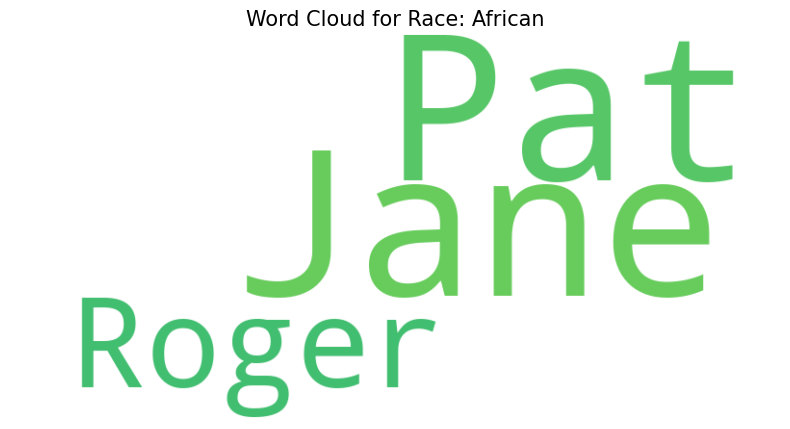

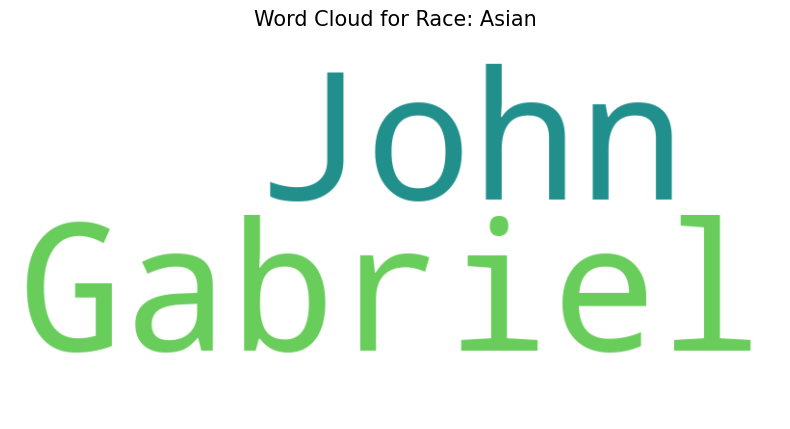

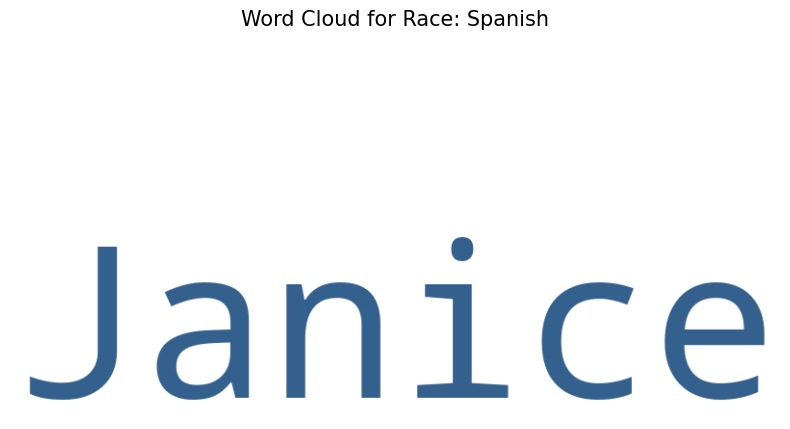

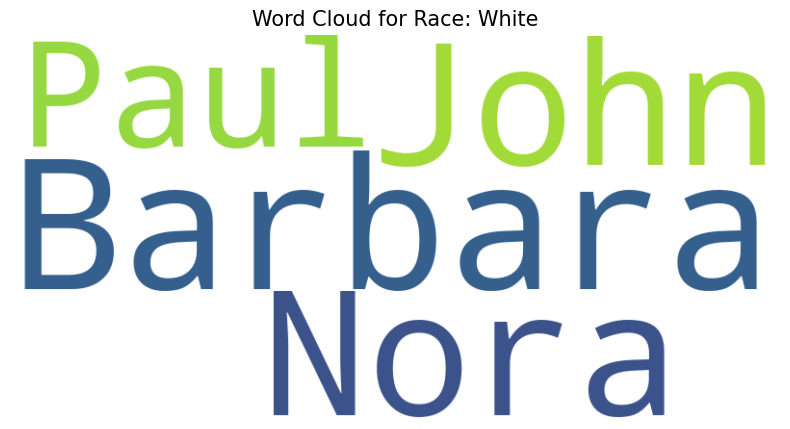

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_Demography.head()
# Grouping first names by race
grouped_names_by_race = df_Demography.groupby('Race')['First Name'].apply(' '.join)

# Display the grouped names to check
grouped_names_by_race.head()
# Function to create and display a word cloud for each race group
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()
    
    # Create and display word clouds for the first few race groups
for race, names in grouped_names_by_race.items():
    create_word_cloud(names, f"Word Cloud for Race: {race}")



<div class="alert alert-block alert-warning">
<b>Q37 :</b>Display the student Names and respective grades who has Maximum heart rate
</div>

In [23]:
df_hr_copy=df_HR.copy()

# max_hr_per_student =round(df_hr_copy['HR'],0).max()
max_hr_per_student =df_hr_copy['HR'].max()

student_max_hr =df_hr_copy[df_hr_copy['HR']==max_hr_per_student]
student_max_hr_grades=pd.merge(student_max_hr,df_Grades , on='Student_id')
columns=['Student_id','HR','Midterm 1','Midterm 2','final']
student_max_hr_grades_df=student_max_hr_grades[columns]
print("The student Names and respective grades who has Maximum heart rate:\n")
student_max_hr_grades_df

The student Names and respective grades who has Maximum heart rate:



Student_id       HR  Midterm 1  Midterm 2  final
0        S04  199.278         75         77    149

<div class="alert alert-block alert-warning">
<b>Q38 :</b>Write a Python program to get the number of occurrences of a specified element in the array.
</div>

In [24]:
def count_occurrences(array, element):
    return array.count(element)

# Example usage
array = [1, 4, 2, 7, 4, 4, 3]
element = 4

num_occurrences = count_occurrences(array, element)
print(f"The element {element} occurs {num_occurrences} times in the array.")

The element 4 occurs 3 times in the array.


<div class="alert alert-block alert-warning">
<b>Q39 :</b>Create a 3D list using nested for loops.
</div>

In [25]:
  #Displaying Each student and their scores in midterm1,midterm2,final exam in 3d list
excel_data=pd.read_excel("Exam Stress Final.xlsx")
students = excel_data['Student_id'].tolist()
midterm1_scores = excel_data['Midterm 1'].tolist()
midterm2_scores = excel_data['Midterm 2'].tolist()
final_scores = excel_data['final'].tolist()

# Creating the 3D list
# Outer list will contain a list for each student
# Each student's list will contain their scores as sub-lists
three_d_list = [[student, [midterm1, midterm2, final]] for student, midterm1, midterm2, final in zip(students, midterm1_scores, midterm2_scores, final_scores)]

# Display the elements of the 3D list 
three_d_list

[['S01', [78, 82, 182]],
 ['S02', [82, 85, 180]],
 ['S03', [77, 90, 188]],
 ['S04', [75, 77, 149]],
 ['S05', [67, 77, 157]],
 ['S06', [71, 64, 175]],
 ['S07', [64, 33, 110]],
 ['S08', [92, 88, 184]],
 ['S09', [80, 39, 126]],
 ['S10', [89, 64, 116]]]

<div class="alert alert-block alert-warning">
<b>Q40 :</b>"Array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

Display each row of this array as a separate slice"
</div>

In [26]:
array = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Display each row as a separate slice
for row in array:
    print(row)


[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


<div class="alert alert-block alert-warning">
<b>Q41 :</b>Find the Student name and the Exam who has the Temprature '36.042'
</div>

In [28]:
# Finding the entries where the temperature is '36.042'
matching_entries = df_Temp[df_Temp['TEMP'] == 36.042]

if not matching_entries.empty:
    
    # Merge to find the student names and exams
    merged_df = pd.merge(matching_entries,df_Demography, on='Student_id')
else:
    merged_df = pd.DataFrame()

merged_df[['Student_id', 'First Name', 'Last Name', 'Exam']]


Student_id First Name Last Name   Exam
0        S02       Nora     Jones  final

<div class="alert alert-block alert-warning">
<b>Q42 :</b>Using arrays and loops, find the count of students based on gender.
</div>

In [29]:
df_Demography =pd.read_excel("Exam Stress Final.xlsx",sheet_name="Demography")
# Extract the gender column as an array
gender_array = df_Demography['Gender'].values

male_count = 0
female_count = 0

# Looping through the array and count the occurrences of each gender
for gender in gender_array:
    if gender == 'M':
        male_count += 1
    elif gender == 'F':
        female_count += 1

# Display the counts
print("Male count :",male_count)
print("Female count:", female_count)

Male count : 5
Female count: 5


<div class="alert alert-block alert-warning">
<b>Q43
    :</b>Generate Unique Student ID  using Lamda Function.
</div>

In [30]:
df_Demography =pd.read_excel("Exam Stress Final.xlsx",sheet_name="Demography")

df_Demography_unique_id=df_Demography
df_Demography_unique_id.reset_index(inplace=True)

# Generating the new unique IDs
df_Demography_unique_id['Unique_Student_ID'] = df_Demography_unique_id.apply(lambda x: x['First Name'][0] + x['Last Name'][0] + str(x['index']).zfill(4), axis=1)

# Display the updated DataFrame with the new unique IDs
df_Demography_unique_id[['Student_id', 'First Name', 'Last Name', 'Unique_Student_ID']]

Student_id First Name  Last Name Unique_Student_ID
0        S01    Barbara    Walters            BW0000
1        S02       Nora      Jones            NJ0001
2        S03    Gabriel    Willows            GW0002
3        S04       John        Doe            JD0003
4        S05       Jane        Doe            JD0004
5        S06        Pat     Murray            PM0005
6        S07      Roger  Frederick            RF0006
7        S08       John      Wills            JW0007
8        S09       Paul    Cartney            PC0008
9        S10     Janice      Smith            JS0009

<div class="alert alert-block alert-warning">
<b>Q44 :</b>Create a Box  plot for HR and Temp
</div>

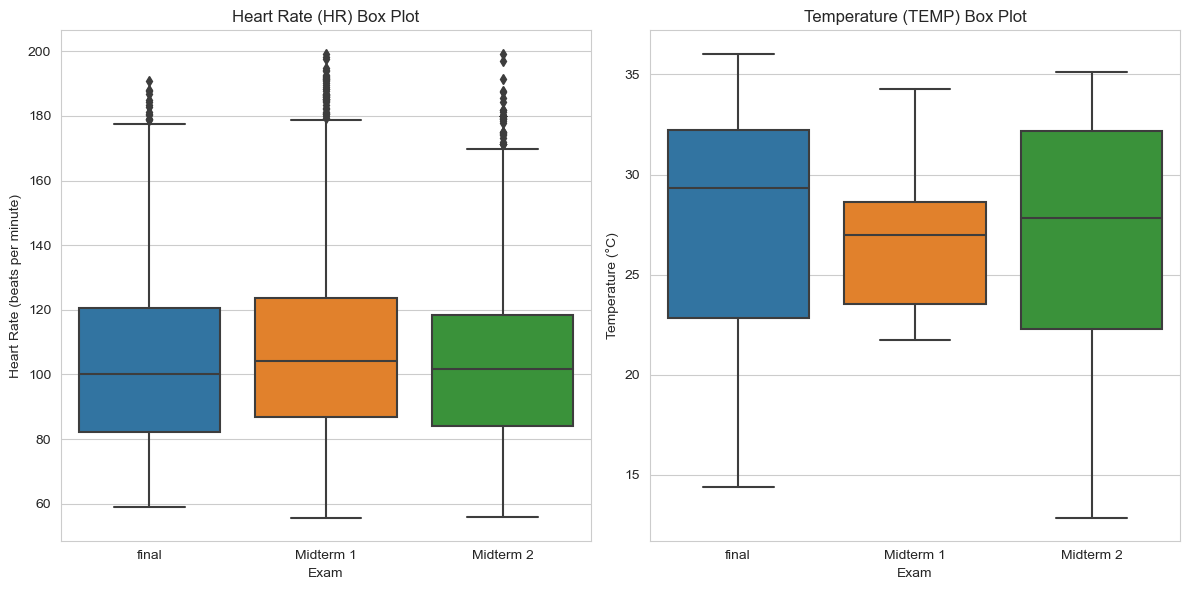

In [122]:

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Creating a box plot for HR
sns.boxplot(x='Exam', y='HR', data=hr_df, ax=axes[0])
axes[0].set_title('Heart Rate (HR) Box Plot')
axes[0].set_xlabel('Exam')
axes[0].set_ylabel('Heart Rate (beats per minute)')

# Creating a box plot for TEMP
sns.boxplot(x='Exam', y='TEMP', data=temp_df, ax=axes[1])
axes[1].set_title('Temperature (TEMP) Box Plot')
axes[1].set_xlabel('Exam')
axes[1].set_ylabel('Temperature (°C)')

plt.tight_layout()

# Showing the plot
plt.show()


<div class="alert alert-block alert-warning">
<b>Q45 :</b>Find the student's Max mean EDA who are attending Final 
</div>

In [31]:
 
final_exam_eda = df_EDA[df_EDA['Exam'] == 'final']

# Calculate the mean EDA for each student
mean_eda_per_student = final_exam_eda.groupby('Student_id')['EDA'].mean()

# Identify the student with the highest mean EDA
student_with_max_mean_eda = mean_eda_per_student.idxmax()
max_mean_eda = mean_eda_per_student.max()

print("Student_id :",student_with_max_mean_eda)
print("Maximum EDA: ",max_mean_eda)

Student_id : S05
Maximum EDA:  0.5424094488188976


<div class="alert alert-block alert-warning">
<b>Q46 :</b>Find the Grade of a Student whose Name ends with 'S'
</div>

In [32]:
# Identifying students whose first or last name ends with 'S'
students_with_s = df_Demography[df_Demography['First Name'].str.endswith('s') | df_Demography['Last Name'].str.endswith('s')]

# Mergeing with the grades data to get their grades
students_with_s_grades = pd.merge(students_with_s, df_Grades, on='Student_id')

students_with_s_grades[['Student_id','First Name', 'Last Name',  'Midterm 1', 'Midterm 2', 'final']]


Student_id First Name Last Name  Midterm 1  Midterm 2  final
0        S01    Barbara   Walters         78         82    182
1        S02       Nora     Jones         82         85    180
2        S03    Gabriel   Willows         77         90    188
3        S08       John     Wills         92         88    184

<div class="alert alert-block alert-warning">
<b>Q47 :</b>Plot Temp analysis of all students during 1 hr of the exam (x axis time and y axis Temp)
</div>

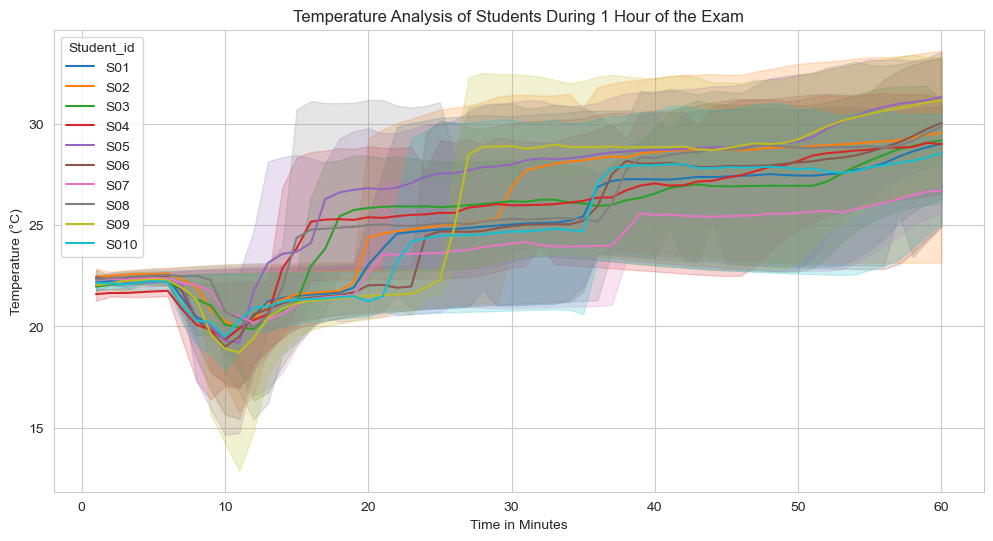

In [36]:
#Temp of all students during 1 hr of the exam
temp_df_1hr = df_Temp[df_Temp['Time in mins'] <= 60]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time in mins', y='TEMP', hue='Student_id', data=temp_df_1hr, palette="tab10", legend="full")

# Set plot title and labels
plt.title('Temperature Analysis of Students During 1 Hour of the Exam')
plt.xlabel('Time in Minutes')
plt.ylabel('Temperature (°C)')

# Show the plot
plt.show()

<div class="alert alert-block alert-warning">
<b>Q48 :</b>Find the Full Name of the student who has Max HR
</div>

In [37]:
# Find the row with the maximum heart rate in the 'df_HR' DataFrame
max_hr_row = df_HR.loc[df_HR['HR'].idxmax()]

# Extract the student ID and maximum heart rate value from the row
max_hr_student_id = max_hr_row['Student_id']
max_hr_value = max_hr_row['HR']

max_hr_student_info = df_Demography[df_Demography['Student_id'] == max_hr_student_id]

# Combine the first name and last name to get the full name of the student
full_name = max_hr_student_info['First Name'].item() + " " + max_hr_student_info['Last Name'].item()

# Print the full name of the student with the maximum heart rate
print("Full Name of the student who has Max HR:", full_name)


Full Name of the student who has Max HR: John Doe


<div class="alert alert-block alert-warning">
<b>Q49 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q50 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q51 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q52 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q53 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q54 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q55 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q56 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q57 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q58 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q59 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q60 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q61 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q62 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q63 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q64 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q65 :</b>Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

</div>

In [5]:
np.random.seed(42)
array = np.random.randint(1,9,size=(3,3))
print(array)

[[7 4 5]
 [7 3 8]
 [5 5 7]]


<div class="alert alert-block alert-warning">
<b>Q66 :</b>Find the way to reverse string for given input (eg: input:this is python hackathon output:hackathon python is this
</div>

In [6]:
string = "this is python hackathon"
s=string.split()[::-1]
l=[]
for i in s:
    l.append(i)
    print(" ".join(l))


hackathon
hackathon python
hackathon python is
hackathon python is this


<div class="alert alert-block alert-warning">
<b>Q67 :</b> From 'Python Hackthon Dec 2023' give'Python Hack'using RegEX

</div>

In [7]:
i='Python Hackthon Dec2023'
s= r'Python Hack'
g=re.search(s,i)
if g:
    print(s)

Python Hack


<div class="alert alert-block alert-warning">
<b>Q68 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q69 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q70 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q71 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q72 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q73 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q74 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q75 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q76 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q77 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q78 :</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q78:</b>
</div>

<div class="alert alert-block alert-warning">
<b>Q80 :</b>
</div>

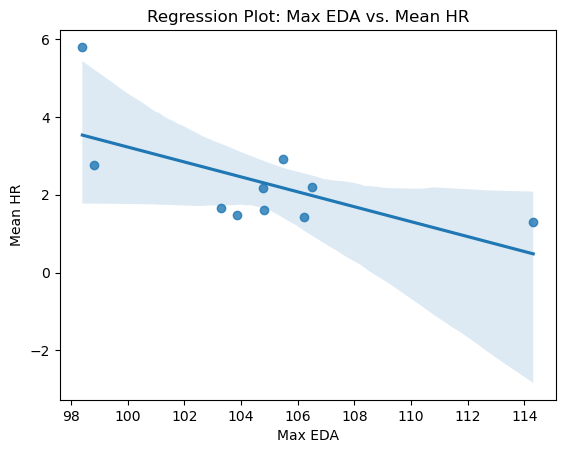

In [169]:
# Merge the two DataFrames on 'StudentID'

mean_hr= df_HR.groupby('Student_id')['HR'].mean()
max_eda= df_EDA.groupby('Student_id')['EDA'].max()
merge_eda_hr = pd.merge(hr,eda, on='Student_id')

# Create a regression plot
sns.regplot(x='HR', y='EDA', data=merge_eda_hr)

# Add labels and title
plt.xlabel('Max EDA')
plt.ylabel('Mean HR')
plt.title('Regression Plot: Max EDA vs. Mean HR')

# Show the plot
plt.show()


# Reference


- [x] __[Markdown Cheatsheet](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)__
- [x] __[A Wearable Exam Stress Dataset for Predicting Cognitive Performance in Real-World Settings](https://physionet.org/content/wearable-exam-stress/1.0.0/)__
- [x] __[Seaborn](https://seaborn.pydata.org/tutorial.html)__
- [x] __[plotly](https://plotly.com/)__
